# JUMPlus Python Project 1
## FIFA Dataset Basic Operations
### by Nicholas Crossman
First, we import pandas and load data from the `.csv` file.

We'll print out the first 5 players, to see what kind of data we're dealing with.

In [39]:
import pandas as pd

data = pd.read_csv("players_20.csv")
data.head().style

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/20/159586,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,1.958e+08,"#Dribbler, #Distance Shooter, #Crosser, #FK Specialist, #Acrobat, #Clinical Finisher, #Complete Forward",RW,10,nan,2004-07-01,2021,nan,nan,87,92,92,96,39,66,nan,nan,nan,nan,nan,nan,"Beat Offside Trap, Argues with Officials, Early Crosser, Finesse Shot, Speed Dribbler (CPU AI Only), 1-on-1 Rush, Giant Throw-in, Outside Foot Shot",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/20/159586,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,9.65e+07,"#Speedster, #Dribbler, #Distance Shooter, #Acrobat, #Clinical Finisher, #Complete Forward",LW,7,nan,2018-07-10,2022,LS,7,90,93,82,89,35,78,nan,nan,nan,nan,nan,nan,"Long Throw-in, Selfish, Argues with Officials, Early Crosser, Speed Dribbler (CPU AI Only), Skilled Dribbling",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-silva-santos-jr/20/159586,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,1.952e+08,"#Speedster, #Dribbler, #Playmaker , #Crosser, #FK Specialist, #Acrobat, #Clinical Finisher, #Complete Midfielder, #Complete Forward",CAM,10,nan,2017-08-03,2022,LW,10,91,85,87,95,32,58,nan,nan,nan,nan,nan,nan,"Power Free-Kick, Injury Free, Selfish, Early Crosser, Speed Dribbler (CPU AI Only), Crowd Favourite",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/159586,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,1.647e+08,nan,GK,13,nan,2014-07-16,2023,GK,1,nan,nan,nan,nan,nan,nan,87,92,78,89,52,90,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,nan,n

## Getting Column Information

As we can see, there are a lot of columns. Let's get a list of the column names.

In [4]:
col_names = list(data)
print(col_names)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

Let's check how many rows and columns the data set has in total.

In [5]:
info = data.shape
rows = str(info[0])
cols = str(info[1])
print("Rows: " + rows)
print("Columns: " + cols)

Rows: 18278
Columns: 104


We'll start with a basic query to see how Pandas DataFrames can be manipulated.
Let's show the number of players from each country, sorted in descending order by player count.

In [42]:
players_by_country = data.groupby("nationality").size().sort_values(ascending=False).head(10)
print(players_by_country)

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
dtype: int64


The `.size()` call counts the number of players in each country group, and the `sort_values()` call orders 
the list by this count, with the `ascending` flag set to `False`.

We use `head(10)` to select the first 10 players from this resulting DataFrame.

## Visualization

Let's try making some visual aids to better convey this information. 
The `data_frame.plot.bar()` function will produce a bar graph from an existing DataFrame. 

We need to import `matplotlib.pyplot` to make the visualizations of our Pandas data. 

By default, the bar plot will give each bar a different color, but we will set them all to green.

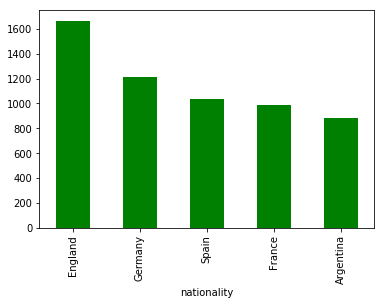

In [6]:
import matplotlib.pyplot as plt

plt.figure() # sets up the canvas
# get the top 5 countries
players_by_country_plot = data.groupby("nationality").size().sort_values(ascending=False).head()
players_by_country_plot.plot.bar(color='green')

Let's make a few more queries to practice.

First, we'll find the first 5 players, and display their short name and wages.

In [52]:
name_and_wages = data.head()[['short_name', 'wage_eur']]
name_and_wages.style

,short_name,wage_eur
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,J. Oblak,125000
4,E. Hazard,470000


Let's show the name and wages of the 5 highest paid players.

In [53]:
name_and_wages_by_salary = data.sort_values('wage_eur', ascending=False).head()[['short_name', 'wage_eur']]
name_and_wages_by_salary.style

,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000


Let's show this as another bar plot. We'll specify the `x` and `y` axis so the index isn't shown instead.

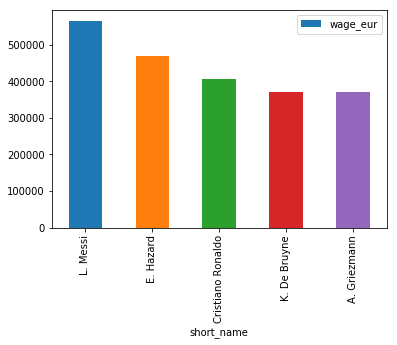

In [12]:
name_and_wages_by_salary.plot.bar(x='short_name', y='wage_eur')

Let's find the first 10 players from Germany.

In [43]:
german_players = data[data['nationality'] == 'Germany'].head(10)
german_players.style

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
6,192448,https://sofifa.com/player/192448/marc-andre-ter-stegen/20/159586,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,3,4,1,Medium/Medium,Normal,Yes,1.434e+08,nan,GK,1,nan,2014-07-01,2022,SUB,22,nan,nan,nan,nan,nan,nan,88,85,88,90,45,88,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31,167495,https://sofifa.com/player/167495/manuel-neuer/20/159586,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,88,88,32000000,155000,GK,Right,5,4,1,Medium/Medium,Normal,Yes,5.28e+07,nan,GK,1,nan,2011-07-01,2021,GK,1,nan,nan,nan,nan,nan,nan,87,87,91,87,57,85,"Power Free-Kick, Flair, Swerve Pass, Acrobatic Clearance",15,13,25,55,11,30,14,11,59,46,54,60,51,84,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,87,87,91,85,87,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
36,182521,https://sofifa.com/player/182521/toni-kroos/20/159586,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,88,88,57000000,330000,CM,Right,4,5,3,Medium/Medium,Normal,Yes,1.169e+08,"#Playmaker , #Crosser, #Complete Midfielder",LCM,8,nan,2014-07-17,2023,SUB,8,45,80,90,81,70,69,nan,nan,nan,nan,nan,nan,"Argues with Officials, Finesse Shot, Crowd Favourite",88,75,58,91,82,80,86,84,92,89,50,41,60,87,71,87,30,74,73,86,60,76,75,89,73,88,72,70,62,10,11,13,7,10,75+3,75+3,75+3,78+3,79+3,79+3,79+3,78+3,81+3,81+3,81+3,79+3,85+3,85+3,85+3,79+3,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
37,188350,https://sofifa.com/player/188350/marco-reus/20/159586,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,88,88,56000000,170000,"CAM, LM, ST",Right,4,4,4,High/Medium,Lean,Yes,9.24e+07,"#Dribbler, #Playmaker , #Distance Shooter, #FK Specialist, #Acrobat, #Clinical Finisher, #Complete Midfielder, #Complete Forward",CAM,11,nan,2012-07-01,2023,ST,11,85,88,84,87,45,66,nan,nan,nan,nan,nan,nan,"Power Free-Kick, Avoids Using Weaker Foot, Beat Offside Trap, Argues with Officials, Early Crosser, Finesse Shot, Speed Dribbler (CPU AI Only)",82,87,49,86,90,87,89,86,77,88,85,85,86,87,84,88,71,76,67,87,51,48,89,86,90,85,49,37,45,12,12,13,13,11,82+3,82+3,82+3,86+3,86+3,86+3,86+3,86+3,86+3,86+3,86+3,85+3,80+3,80+3,80+3,85+3,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3
49,178603,https://sofifa.com/player/178603/mats-hummels/20/159586,M. Hummels,Mats Hummels,30,1988-12-16,191,94,Germany,Borussia Dortmund,87,87,41000000,130000,CB,Right,4,3,3,High/Medium,Normal,Yes,6.77e+07,"#Tackling , #Tactician",LCB,15,nan

Now, let's sort the top 5 German players by height, weight, and wages.

In [44]:
german_players_sorted = data[data['nationality'] == 'Germany'].sort_values(['height_cm', 'weight_kg', 'wage_eur'], ascending=False).head()
german_players_sorted.style

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
8016,236831,https://sofifa.com/player/236831/aaron-seydel/20/159586,A. Seydel,Aaron Seydel,23,1996-02-07,199,90,Germany,1. FSV Mainz 05,67,73,1100000,9000,"ST, LM",Left,1,4,3,Medium/Low,Normal,No,2e+06,nan,SUB,36,nan,2016-11-27,2021,nan,nan,68,64,53,66,29,66,nan,nan,nan,nan,nan,nan,"Power Free-Kick, Crowd Favourite",59,68,69,58,59,69,43,31,35,72,67,69,53,58,34,66,63,51,78,56,55,19,63,59,55,68,25,28,22,12,9,14,11,9,66+2,66+2,66+2,64+2,65+2,65+2,65+2,64+2,62+2,62+2,62+2,62+2,54+2,54+2,54+2,62+2,46+2,43+2,43+2,43+2,46+2,44+2,43+2,43+2,43+2,44+2
1389,199833,https://sofifa.com/player/199833/lars-unnerstall/20/159586,L. Unnerstall,Lars Unnerstall,28,1990-07-20,198,103,Germany,PSV,76,78,6500000,14000,GK,Right,1,1,1,Medium/Medium,Stocky,No,9.6e+06,nan,SUB,13,nan,2018-07-01,2021,nan,nan,nan,nan,nan,nan,nan,nan,76,75,72,77,33,74,nan,10,13,10,26,15,16,13,11,24,19,28,37,19,72,20,54,40,35,82,12,36,21,13,42,16,58,11,17,15,76,75,72,74,77,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1217,200212,https://sofifa.com/player/200212/michael-esser/20/159586,M. Esser,Michael Esser,31,1987-11-22,198,97,Germany,Hannover 96,77,77,5500000,23000,GK,Right,1,3,1,Medium/Medium,Normal,Yes,8.8e+06,nan,SUB,23,nan,2017-07-01,2020,nan,nan,nan,nan,nan,nan,nan,nan,77,74,64,82,41,75,Flair,10,8,25,39,9,15,14,17,35,17,32,48,30,72,28,48,67,37,82,19,40,30,6,48,23,53,20,15,16,77,74,64,75,82,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
13576,239746,https://sofifa.com/player/239746/lukas-watkowiak/20/159586,L. Watkowiak,Lukas Watkowiak,23,1996-03-06,197,103,Germany,SV Wehen Wiesbaden,62,68,325000,2000,GK,Right,1,3,1,Medium/Medium,Stocky,No,569000,nan,GK,1,nan,2017-07-01,2021,nan,nan,nan,nan,nan,nan,nan,nan,59,59,57,66,22,63,nan,13,7,13,19,5,10,11,12,25,18,20,23,18,54,19,43,27,26,83,8,32,6,6,32,15,21,7,13,13,59,59,57,63,66,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
518,179783,https://sofifa.com/player/179783/ralf-fahrmann/20/159586,R. Fährmann,Ralf Fährmann,30,1988-09-27,197,98,Germany,Norwich City,80,80,10000000,43000,GK,Right,2,1,1,Medium/Medium,Normal,Yes,nan,nan,SUB,21,FC Schalke 04,nan,2020,nan,nan,nan,nan,nan,nan,nan,nan,82,79,44,84,43,79,"Giant Throw-in, Acrobatic Clearance, Flair Passes",14,11,15,25,11,15,18,11,26,24,38,47,39,81,36,33,72,32,79,9,36,23,11,42,21,61,10,12,10,82,79,44,79,84,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


Let's go back and show the short name and wages of the first 5 German players.

In [45]:
all_german_players = data[data['nationality'] == 'Germany']
name_and_wages_german = all_german_players.head()[['short_name', 'wage_eur']]
name_and_wages_german.style

,short_name,wage_eur
6,M. ter Stegen,250000
31,M. Neuer,155000
36,T. Kroos,330000
37,M. Reus,170000
49,M. Hummels,130000


## Metrics

The dataset from FIFA has a lot of columns, including measurements of different aspects of the players' performance.

Let's try to find the top 5 players in the world by their shooting skills.
The dataset lists this attribute as `shooting`.

In [46]:
best_shooters = data.sort_values('shooting', ascending=False).head()[['short_name', 'shooting']]
best_shooters.style

,short_name,shooting
1,Cristiano Ronaldo,93
0,L. Messi,92
12,H. Kane,91
17,S. Agüero,90
205,F. Quagliarella,89


Next we will get the top 5 defenders in the world, and show more information about them.

In [47]:
best_defenders = data.sort_values('defending', ascending=False).head()[['short_name', 'defending', 'nationality', 'club']]
best_defenders.style

,short_name,defending,nationality,club
16,G. Chiellini,90,Italy,Juventus
7,V. van Dijk,90,Netherlands,Liverpool
11,K. Koulibaly,89,Senegal,Napoli
35,D. Godín,89,Uruguay,Inter
49,M. Hummels,89,Germany,Borussia Dortmund


### Real Madrid

Finally, let's list some information of Real Madrid players.

In [28]:
real_madrid = data[data['club'] == 'Real Madrid']

First their wages.

In [48]:
real_madrid_wages = real_madrid.head()[['short_name', 'wage_eur']]
real_madrid_wages.style

,short_name,wage_eur
4,E. Hazard,470000
8,L. Modrić,340000
18,Sergio Ramos,300000
28,T. Courtois,235000
36,T. Kroos,330000


Then their shooting.

In [49]:
real_madrid_shooting = real_madrid.head()[['short_name', 'shooting']]
real_madrid_shooting.style

,short_name,shooting
4,E. Hazard,83
8,L. Modrić,76
18,Sergio Ramos,68
28,T. Courtois,nan
36,T. Kroos,80


Then their defending score.

In [50]:
real_madrid_defending = real_madrid.head()[['short_name', 'defending']]
real_madrid_defending.style

,short_name,defending
4,E. Hazard,35
8,L. Modrić,72
18,Sergio Ramos,87
28,T. Courtois,nan
36,T. Kroos,70


And finally their nationality.

In [51]:
real_madrid_nationality = real_madrid.head()[['short_name', 'nationality']]
real_madrid_nationality.style

,short_name,nationality
4,E. Hazard,Belgium
8,L. Modrić,Croatia
18,Sergio Ramos,Spain
28,T. Courtois,Belgium
36,T. Kroos,Germany


### Additional Queries

Let's make some more complex queries to practice working with DataFrames.

Let's find the 5 highest valued Italian players whose contracts have been extended beyond 2021.

In [64]:
italian_players = data[data['nationality'] == 'Italy']
highest_value_italian = italian_players.sort_values('value_eur', ascending=False).head()
contract_valid = highest_value_italian[highest_value_italian['contract_valid_until'] > 2021].head()[['short_name', 'wage_eur']]
contract_valid.style

,short_name,wage_eur
54,L. Insigne,140000
71,C. Immobile,105000
158,A. Romagnoli,46000


## Conclusion

This has been a basic practice with Pandas and Jupyter notebooks. I find them easy and enjoyable to use, and will consider 
them in future projects.